In [10]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [11]:
dir(housing)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [12]:
housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [13]:
housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [14]:
housing.target.head()


0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

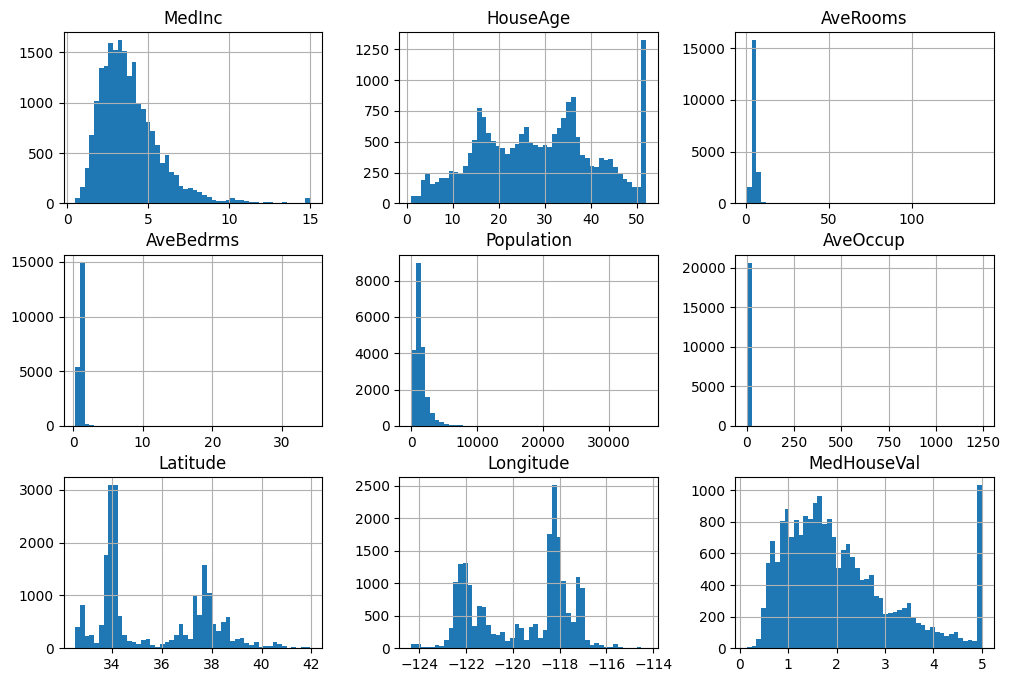

In [15]:
import matplotlib.pyplot as plt

housing.frame.hist(bins=50, figsize=(12, 8))
plt.show()

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split

np.random.seed(42)
X = housing.data
y = housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


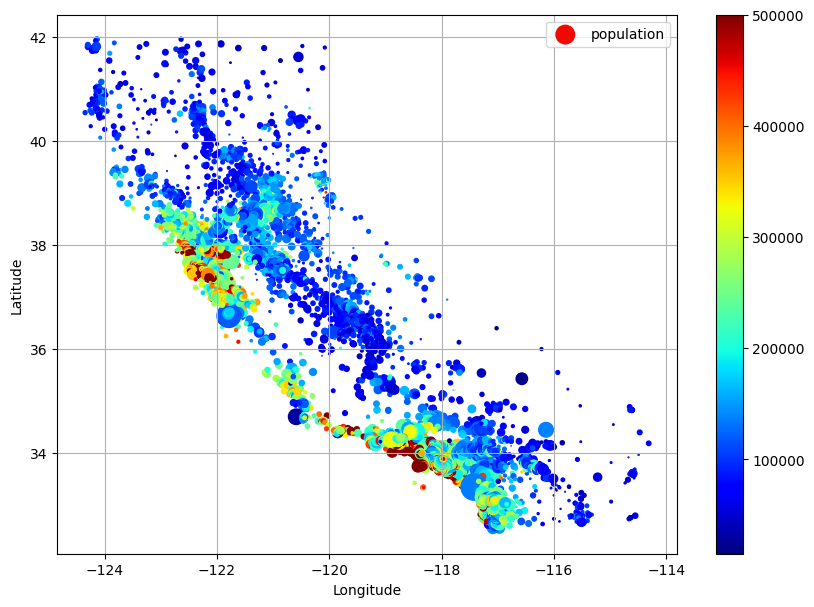

In [17]:
# visualizing geographical data
housing.frame.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                   s=housing.frame["Population"]/100, label="population", figsize=(10, 7),
                   c=housing.frame["MedHouseVal"] * 100000, cmap="jet", colorbar=True)
plt.legend()
plt.show()

In [18]:
# calculate correlation matrix

corr_matrix = housing.frame.corr()
corr_matrix["MedHouseVal"].sort_values(ascending=False)


MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64

array([[<Axes: xlabel='MedHouseVal', ylabel='MedHouseVal'>,
        <Axes: xlabel='MedInc', ylabel='MedHouseVal'>,
        <Axes: xlabel='AveRooms', ylabel='MedHouseVal'>,
        <Axes: xlabel='HouseAge', ylabel='MedHouseVal'>],
       [<Axes: xlabel='MedHouseVal', ylabel='MedInc'>,
        <Axes: xlabel='MedInc', ylabel='MedInc'>,
        <Axes: xlabel='AveRooms', ylabel='MedInc'>,
        <Axes: xlabel='HouseAge', ylabel='MedInc'>],
       [<Axes: xlabel='MedHouseVal', ylabel='AveRooms'>,
        <Axes: xlabel='MedInc', ylabel='AveRooms'>,
        <Axes: xlabel='AveRooms', ylabel='AveRooms'>,
        <Axes: xlabel='HouseAge', ylabel='AveRooms'>],
       [<Axes: xlabel='MedHouseVal', ylabel='HouseAge'>,
        <Axes: xlabel='MedInc', ylabel='HouseAge'>,
        <Axes: xlabel='AveRooms', ylabel='HouseAge'>,
        <Axes: xlabel='HouseAge', ylabel='HouseAge'>]], dtype=object)

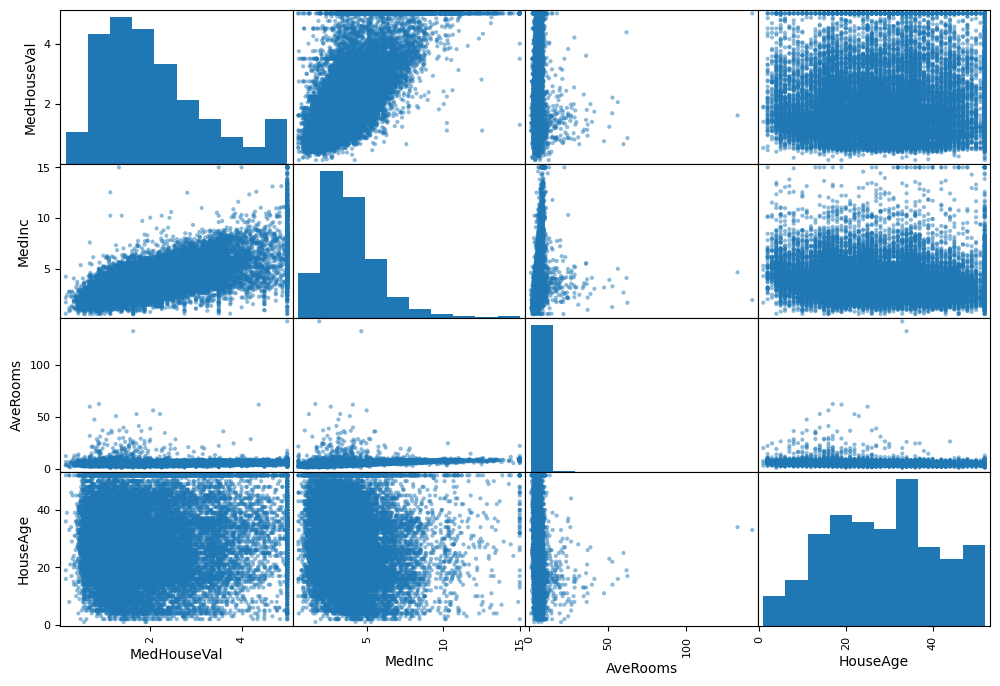

In [19]:
from pandas.plotting import scatter_matrix
attributes = ["MedHouseVal", "MedInc", "AveRooms",
              "HouseAge"]
scatter_matrix(housing.frame[attributes], figsize=(12, 8))

In [20]:
# train with sklearn model

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_bias = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_bias = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

In [21]:

lin_reg = LinearRegression(fit_intercept=False)
lin_reg.fit(X_train_bias, y_train)

LinearRegression(fit_intercept=False)

In [22]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

y_pred = lin_reg.predict(X_test_bias)


rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

RMSE: 0.7456
MAE: 0.5332


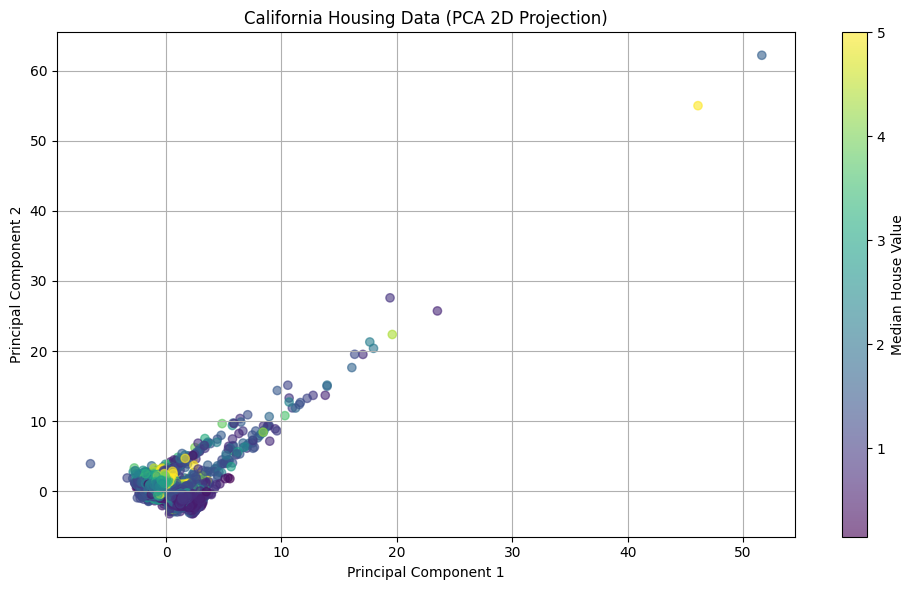

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_scaled = scaler.fit_transform(X)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=y, cmap='viridis', alpha=0.6
)
plt.colorbar(scatter, label="Median House Value")
plt.title("California Housing Data (PCA 2D Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
# Linear Regression

type(y_train)

pandas.core.series.Series

In [25]:
def linear_regression_train(X, y):
    return np.linalg.pinv(X.T @ X) @ X.T @ y

theta = linear_regression_train(X_train_bias, y_train)

print('theta: ', theta)
print('coef: ', lin_reg.coef_)

theta:  [ 2.07194694  0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772
 -0.0408291  -0.89692888 -0.86984178]
coef:  [ 2.07194694  0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772
 -0.0408291  -0.89692888 -0.86984178]


In [26]:
y_pred = X_test_bias @ theta

rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
mae = np.mean(np.abs(y_pred - y_test))

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


RMSE: 0.7456
MAE: 0.5332


# 2. Penguins Regression

In [27]:
import os
import requests

def download_github_folder(repo_owner, repo_name, folder_path, local_dir, branch="main"):
    """
    Downloads a folder from a GitHub repo using the GitHub API.
    
    Parameters:
        repo_owner: str - e.g. 'scikit-learn'
        repo_name: str - e.g. 'scikit-learn'
        folder_path: str - path inside the repo, e.g. 'sklearn/linear_model'
        local_dir: str - local path to save the files
        branch: str - branch name, default is 'main'
    """
    api_url = f"https://api.github.com/repos/{repo_owner}/{repo_name}/contents/{folder_path}?ref={branch}"
    response = requests.get(api_url)
    response.raise_for_status()

    os.makedirs(local_dir, exist_ok=True)

    for file_info in response.json():
        file_name = file_info['name']
        file_path = os.path.join(local_dir, file_name)

        if file_info['type'] == 'file':
            download_url = file_info['download_url']
            print(f"Downloading {file_name}...")
            file_data = requests.get(download_url).content
            with open(file_path, 'wb') as f:
                f.write(file_data)

        elif file_info['type'] == 'dir':
            # Recurse into subfolders
            subfolder_path = file_info['path']
            subfolder_local = os.path.join(local_dir, file_name)
            download_github_folder(repo_owner, repo_name, subfolder_path, subfolder_local, branch)

def download_github_file(repo_owner, repo_name, file_path, local_file, branch="main"):
    api_url = f"https://api.github.com/repos/{repo_owner}/{repo_name}/contents/{file_path}?ref={branch}"
    response = requests.get(api_url)
    response.raise_for_status()

    file_info = response.json()
    if file_info['type'] != 'file':
        raise ValueError("")

    download_url = file_info['download_url']
    file_data = requests.get(download_url).content

    os.makedirs(os.path.dirname(local_file), exist_ok=True)

    with open(local_file, 'wb') as f:
        f.write(file_data)
    print(f"Done: {local_file}")


download_github_file(
    repo_owner="INRIA",
    repo_name="scikit-learn-mooc",
    file_path="datasets/penguins_regression.csv",
    local_file="./datasets/penguins_regression.csv",
    branch="main"
)

Done: ./datasets/penguins_regression.csv


In [52]:
import pandas as pd

penguins = pd.read_csv("./datasets/penguins_regression.csv")
penguins.head()


,Flipper Length (mm),Body Mass (g)
0,181.0,3750.0
1,186.0,3800.0
2,195.0,3250.0
3,193.0,3450.0
4,190.0,3650.0


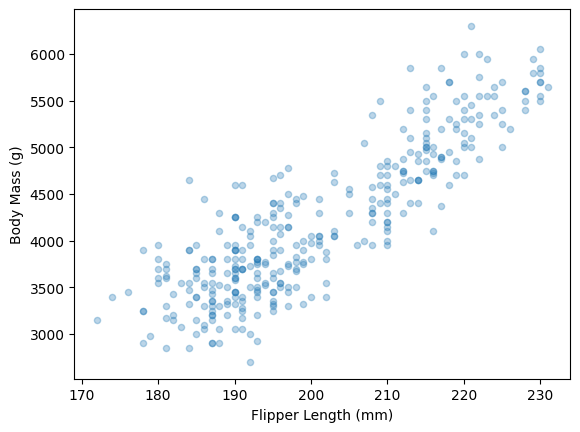

In [29]:
penguins.plot(kind="scatter", x="Flipper Length (mm)", y="Body Mass (g)", alpha=0.3)
plt.show()

In [84]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin

class PeguinsRegression(BaseEstimator, RegressorMixin):
    def __init__(self):
        self.coef_ = None

    def fit(self, X, y):
        XTX = X.T.dot(X)
        XTy = X.T.dot(y)
        w = np.linalg.pinv(XTX).dot(XTy)
        self.coef_ = w
        return self

    def predict(self, X):
        return X @ self.coef_


In [90]:
X = penguins["Flipper Length (mm)"]
y = penguins["Body Mass (g)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]

pen_reg = PeguinsRegression()
pen_reg.fit(X_train_bias, y_train)

y_pred = pen_reg.predict(X_test_bias)

rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
mae = np.mean(np.abs(y_pred - y_test))

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

print(f"Coef: {pen_reg.coef_}")


RMSE: 356.0459
MAE: 287.9446
Coef: [-2908.43697653    49.85075483]


In [103]:
lin_reg = LinearRegression(fit_intercept=False)
lin_reg.fit(X_train_bias, y_train)

y_pred = lin_reg.predict(X_test_bias)

rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

print(f"Coef: {lin_reg.coef_}")


RMSE: 356.0459
MAE: 287.9446
Coef: [-5816.87395312    49.85075483]


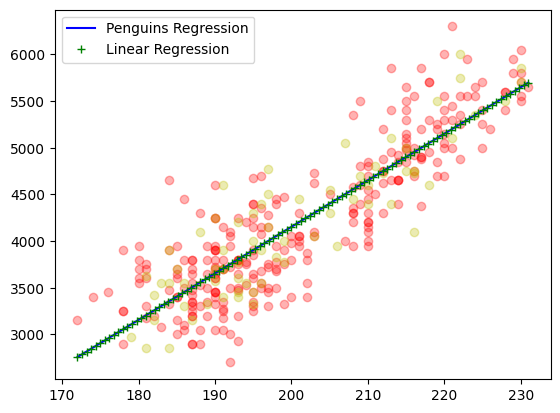

In [102]:
plt.plot(X_train, y_train, 'ro', alpha=0.3)
plt.plot(X_test, y_test, 'yo', alpha=0.3)

x0 = np.linspace(X.min(), X.max(), 100, endpoint=True)
x = np.c_[np.ones((x0.shape[0], 1)), x0]

y0 = pen_reg.predict(x)
y1 = lin_reg.predict(x)

plt.plot(x0, y0, 'b-', label="Penguins Regression")
plt.plot(x0, y1, 'g+', label="Linear Regression")

plt.legend()
plt.show()
